# **Cincinnati's Over-The-Rhine Gentrification**

## What is Gentrification? 
   * It is a social phenomenon occurring in many inner-city neighborhoods, especially after the 2008 recession
   * One of the most gentrified neighborhoods in the city of Cincinnati is Over-The-Rhine (OTR)
   * Gentrification is the movement of higher-income residents into lower-income neighborhoods causing the displacement of lower-income residents from the neighborhood that occurs as a result of this movement 
   
   * Higher-income residents usually:
       * Are white populations moving to affordable areas
       * Have higher education
       * Have higher income
       
   * The same Neighborhoods that are experiencing gentrification experienced the White Flight phenomenon.
       * White Flight is the process by which white households left central cities to avoid living in racially diverse neighborhoods or jurisdictions
       * To confirm such affirmation, demographic census data on white and Black populations are analyzed from years 1950 to 2020.
       
       
   * In order to determine if the neighborhood OTR is experiencing gentrification the following data is analyzed:
        * Geojson file from Census Reporter to provide geographical references
        * Official census data to determine demographic changes
        * ACS surveys to establish if demographic changes are correlated with educational and median income changes
   

# Creating spatial visualizations
* Using a geopandas library to offer a visualization and reference of the location of the OTR neighborhood

In [1]:
#Importing the needed libraries

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps
import contextily as ctx

# to provide plots
import matplotlib.pyplot as plt

#Other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
#Importing Data

# Load a data file
gdf = gpd.read_file('Data sets/acs2020_5yr_B03002_14000US39061008202.geojson')

# Get the number of rows and columns
gdf.shape

#Changing the number of rows displayed
pd.set_option('display.max_rows', None)

# Finding what row contains Tract 9,10,16,17 (OTR neighborhood)
gdf.loc[gdf['name'] == 'Census Tract 9, Hamilton, OH']
gdf.loc[gdf['name'] == 'Census Tract 10, Hamilton, OH']
gdf.loc[gdf['name'] == 'Census Tract 16, Hamilton, OH']
gdf.loc[gdf['name'] == 'Census Tract 17, Hamilton, OH']

#Getting info about rows
    #[0:1] - United States
    #[[1:2] - Ohio State
    #[[2:3] - Hamilton County
    #[[122:123] - Cincinnati
    #[Over-The-Rhine (OTR) Neighborhood
    #[[5:6] - Tract 9
    #[[6:7] - Tract 10
    #[[8:9] - Tract 16
    #[[9:10] - Tract 17

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
9,14000US39061001700,"Census Tract 17, Hamilton, OH",1136.0,276.0,1122.0,277.0,411.0,184.0,601.0,178.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-84.51752 39.11946, -84.51742 ..."


In [3]:
#Cleaning Data

# Columns, null values, data types
    #gdf.info()


#list columns we have
    #list(gdf)


# Create a list of columns to keep - After checking metadata file
columns_to_keep = ['geoid',
                   'name',
                   'B03002001',
                   'B03002002',
                   'B03002003',
                   'B03002004',
                   'B03002005',
                   'B03002006',
                   'B03002007',
                   'B03002008',
                   'B03002012',
                   'geometry']


# Assign only the columns I want to keep to my dataframe
gdf = gdf[columns_to_keep]


#Rename the columns based on the metadata.json
gdf.columns = ['geoid',
               'name',
               'Total',
               'Not Hispanic or Latino',
               'White alone',
               'Black or African American alone',
               'American Indian and Alaska Native alone',
               'Asian alone',
               'Native Hawaiian and Other Pacific Islander alone',
               'Some other race alone',
               'Hispanic or Latino',
               'geometry']

# Want to drop almost all rows except the ones for neighborhood Over-The-Rhine and Cincinnati, 
# and Hamilton County, Ohio State, United States. 
# OTR= Tracts 9,10,16,17 = rows with index 5,6,8,9

gdf.index.values


gdf = gdf.drop([3, 4,    7,   10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 123])


# Location references:
* United States
* Ohio State
* Hamilton County
* Cincinnati
* OTR

[Text(0.5, 1.0, 'Ohio State in United States')]

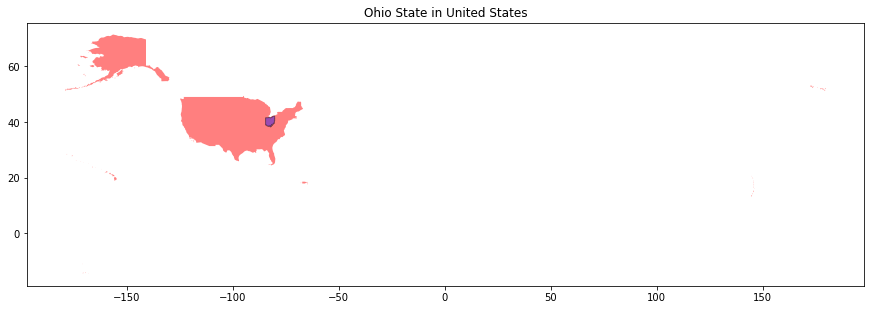

In [4]:
#Creating an impose plot of Ohio State over United States
fig, ax = plt.subplots(figsize = (15,10))
ax.set_aspect('equal')
gdf.iloc[0:1].geometry.plot(ax=ax, marker='o', color='red', alpha = 0.5, markersize=5)
gdf.iloc[1:2].plot(ax = ax, alpha = 0.4, color = 'blue', edgecolor = 'black')
ax.set(title='Ohio State in United States')

<AxesSubplot:title={'center':'Hamilton County in Ohio State'}>

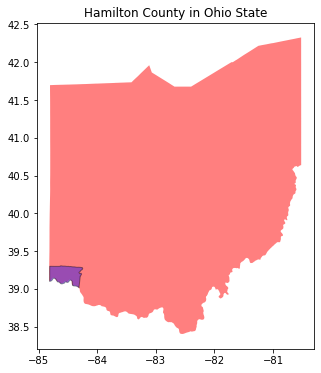

In [5]:
#Creating an impose plot of Hamilton County over Ohio State
fig, ax = plt.subplots(figsize = (8,6))
ax.set_aspect('equal')
ax.set(title='Hamilton County in Ohio State')
gdf.iloc[1:2].geometry.plot(ax=ax, marker='o', color='red', alpha = 0.5, markersize=5)
gdf.iloc[2:3].plot(ax = ax, alpha = 0.4, color = 'blue', edgecolor = 'black')

[Text(0.5, 1.0, 'Cincinnati in Hamilton County')]

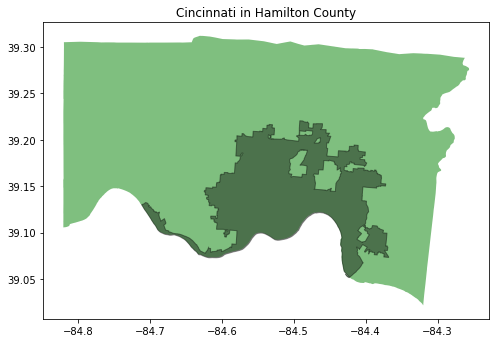

In [6]:
#Creating an impose plot of Cincinnati over Hamilton County
fig, ax = plt.subplots(figsize = (8,6))
ax.set_aspect('equal')
gdf.iloc[2:3].geometry.plot(ax=ax, marker='o', color='green', alpha = 0.5, markersize=5)
gdf.iloc[7:8].plot(ax = ax, alpha = 0.4, color = 'black', edgecolor = 'black')
ax.set(title='Cincinnati in Hamilton County')

[Text(0.5, 1.0, 'OTR in Cincinnati')]

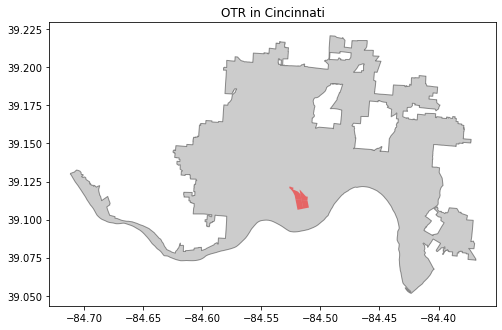

In [7]:
#Creating an impose plot of OTR over Cincinnati
fig, ax = plt.subplots(figsize = (8,6))
ax.set_aspect('equal')

gdf.iloc[7:8].plot(ax = ax, alpha = 0.4, color = 'grey', edgecolor = 'black')
gdf.iloc[3:7].geometry.plot(ax=ax, marker='o', color='red', alpha = 0.5, markersize=5)
ax.set(title='OTR in Cincinnati')

# Spatial Visualizations of OTR:
* White and Black populations size in OTR
* Quartile intervals of white and Black populations in OTR
* Basemaps of OTR 

Text(0.5, 1.0, 'Black Population in OTR')

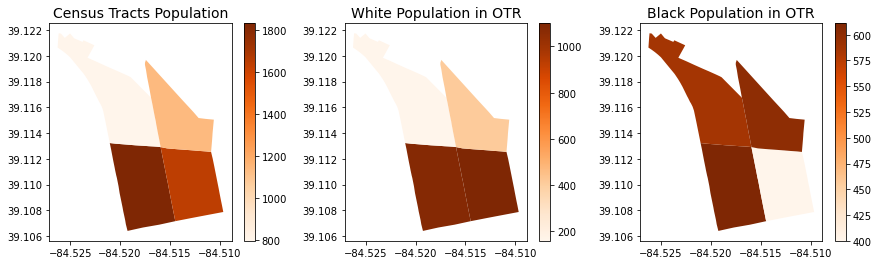

In [8]:
# A plot showing different color by population size

fig, ax = plt.subplots(1,3, figsize= (15,4))

ax1, ax2, ax3 = ax
ax1 = gdf.iloc[3:7].plot(column='Total', cmap='Oranges',ax = ax1, legend= True)
ax1.set_title('Census Tracts Population', fontsize = 14) 

ax2 = gdf.iloc[3:7].plot(column=('White alone'), ax = ax2, cmap='Oranges',legend= True)
ax2.set_title('White Population in OTR', fontsize = 14) 

ax3 = gdf.iloc[3:7].plot(ax = ax3, column=('Black or African American alone'), cmap='Oranges',legend= True)
ax3.set_title('Black Population in OTR', fontsize = 14) 

Text(0.5, 1.0, 'Quartile Intervals Black Population')

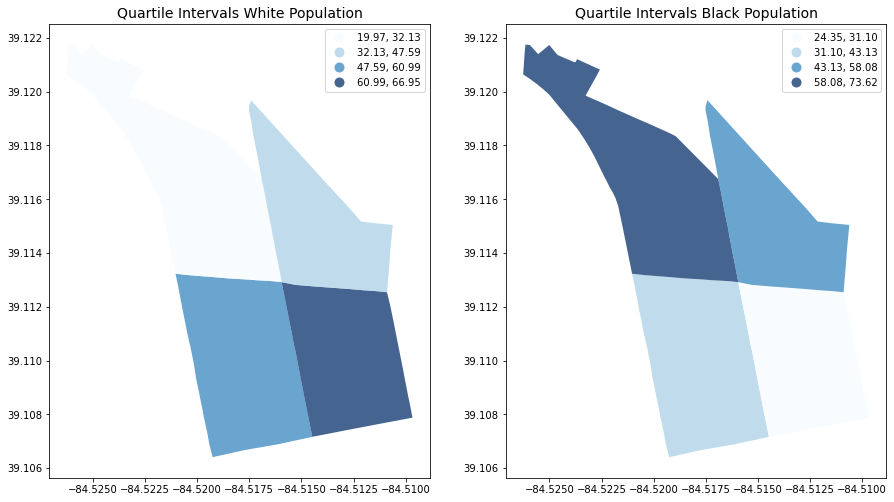

In [9]:
#Create two columns with percentages of White and Black population
gdf['Percent white'] = gdf['White alone']/gdf['Total']*100
gdf['Percent Black'] = gdf['Black or African American alone']/gdf['Total']*100


#Quantile intervals visualization
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))

gdf.iloc[3:7].plot(column = 'Percent white', ax = ax1, cmap = "Blues", legend = True, scheme ='quantiles',k=4,
                   edgecolor='white', linewidth=0., alpha= 0.75,)
ax1.set_title('Quartile Intervals White Population', fontsize = 14) 


gdf.iloc[3:7].plot(column = 'Percent Black', ax = ax2,cmap = "Blues", scheme='quantiles', k=4, 
                   edgecolor='white', linewidth=0., alpha= 0.75,legend=True)
ax2.set_title('Quartile Intervals Black Population', fontsize = 14) 


C:\Users\Jesus\anaconda3\envs\gis\lib\site-packages\geopandas\geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
C:\Users\Jesus\anaconda3\envs\gis\lib\site-packages\geopandas\geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


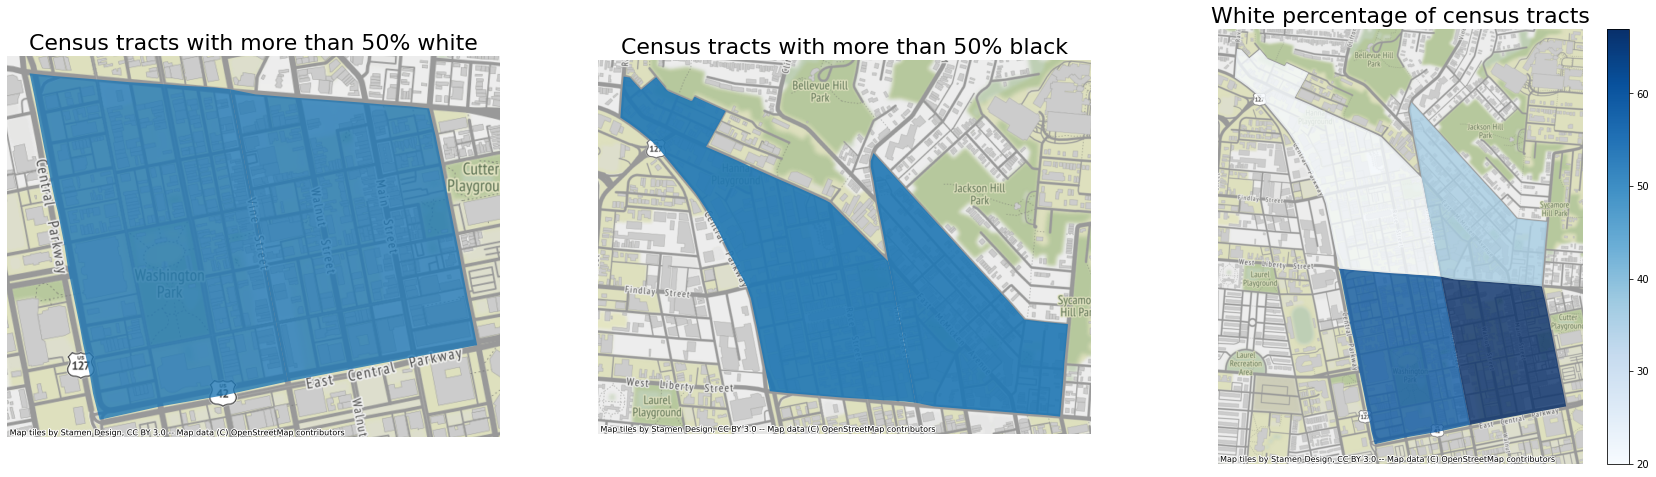

In [10]:
# Creating plots adding basemaps

gdf_web_mercator = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(1,3, figsize=(30,8))
ax1, ax2, ax3 = ax

gdf_web_mercator.iloc[3:7][gdf_web_mercator['Percent white'] > 50].plot(figsize = (25,10), ax=ax1, alpha=0.8)
ax1.axis('off')
ax1.set_title('Census tracts with more than 50% white', fontsize = 22)

gdf_web_mercator.iloc[3:7][gdf_web_mercator['Percent Black'] > 50].plot(figsize = (25,10),ax=ax2, alpha=0.9)
ax2.axis('off')
ax2.set_title('Census tracts with more than 50% black', fontsize = 22)

ax3 = gdf_web_mercator.iloc[3:7].plot( column = 'Percent white',alpha=0.8, ax=ax3,cmap='Blues', legend=True,)
ax3.axis('off')
ax3.set_title('White percentage of census tracts', fontsize = 22)


ctx.add_basemap(ax1, zoom=16)
ctx.add_basemap(ax2, zoom=16)
ctx.add_basemap(ax3, zoom=16)

# Comparison of White and Black populations
* Using census data to analyze demographic changes in OTR from the year 1950 to 2020

In [11]:
#Importing pickle files

pdf1950 = pd.read_pickle('Notebooks and pkls/pdf1950.pkl')
pdf1960 = pd.read_pickle('Notebooks and pkls/pdf1960.pkl')
pdf1970 = pd.read_pickle('Notebooks and pkls/pdf1970.pkl')
pdf1980 = pd.read_pickle('Notebooks and pkls/pdf1980.pkl')
pdf1990 = pd.read_pickle('Notebooks and pkls/pdf1990.pkl')
pdf2000 = pd.read_pickle('Notebooks and pkls/pdf2000.pkl')
pdf2010 = pd.read_pickle('Notebooks and pkls/pdf2010.pkl')
pdf2020 = pd.read_pickle('Notebooks and pkls/pdf2020.pkl')

df_edu_2000 = pd.read_pickle('Notebooks and pkls/df_edu_2000.pkl')
df_edu_2010 = pd.read_pickle('Notebooks and pkls/df_edu_2010.pkl')
df_edu_2020 = pd.read_pickle('Notebooks and pkls/df_edu_2020.pkl')

df_inc_2000 = pd.read_pickle('Notebooks and pkls/df_inc_2000.pkl')
df_inc_2010 = pd.read_pickle('Notebooks and pkls/df_inc_2010.pkl')
df_inc_2020 = pd.read_pickle('Notebooks and pkls/df_inc_2020.pkl')

In [12]:
#creating a dataframe for white population for years 1950 - 2020

# Create an empty list
White_1950_list =[]
White_1960_list =[]
White_1970_list =[]
White_1980_list =[]
White_1990_list =[]
White_2000_list =[]
White_2010_list =[]
White_2020_list =[]
  
def extract_rows(pdf):
    new_row = None
    for i, row in pdf.iloc[1:2].iterrows():
        new_row = [row['Census Tract 9, Hamilton County, Ohio'], row['Census Tract 10, Hamilton County, Ohio'],
                       row['Census Tract 16, Hamilton County, Ohio'], row['Census Tract 17, Hamilton County, Ohio'],
                       row['TOTAL (All Selected Census Tracts)']]
    return new_row

    
White_1950_list = extract_rows(pdf1950)
White_1960_list = extract_rows(pdf1960)
White_1970_list = extract_rows(pdf1970)
White_1980_list = extract_rows(pdf1980)
White_1990_list = extract_rows(pdf1990)
White_2000_list = extract_rows(pdf2000)
White_2010_list = extract_rows(pdf2010)
White_2020_list = extract_rows(pdf2020)


#creating df
Category = ['Census Tract 9', 'Census Tract 10', 'Census Tract 16', 'Census Tract 17', 'Total OTR']

data = {'Category' :Category,
        '1950': White_1950_list,
        '1960': White_1960_list,
        '1970': White_1970_list,
        '1980': White_1980_list,
        '1990': White_1990_list,
        '2000': White_2000_list,
        '2010': White_2010_list,
        '2020': White_2020_list}

Wdf = pd.DataFrame.from_dict(data)        

In [13]:
#creating a dataframe for Black population for years 1950 - 2020

# Create an empty list
Black_1950_list =[]
Black_1960_list =[]
Black_1970_list =[]
Black_1980_list =[]
Black_1990_list =[]
Black_2000_list =[]
Black_2010_list =[]
Black_2020_list =[]
  
def extract_rows(pdf):
    new_row = None
    for i, row in pdf.iloc[2:3].iterrows():
        new_row = [row['Census Tract 9, Hamilton County, Ohio'], row['Census Tract 10, Hamilton County, Ohio'],
                       row['Census Tract 16, Hamilton County, Ohio'], row['Census Tract 17, Hamilton County, Ohio'],
                       row['TOTAL (All Selected Census Tracts)']]
    return new_row

    
Black_1950_list = extract_rows(pdf1950)
Black_1960_list = extract_rows(pdf1960)
Black_1970_list = extract_rows(pdf1970)
Black_1980_list = extract_rows(pdf1980)
Black_1990_list = extract_rows(pdf1990)
Black_2000_list = extract_rows(pdf2000)
Black_2010_list = extract_rows(pdf2010)
Black_2020_list = extract_rows(pdf2020)


#creating df
Category = ['Census Tract 9', 'Census Tract 10', 'Census Tract 16', 'Census Tract 17', 'Total OTR']

data = {'Category' :Category,
        '1950': Black_1950_list,
        '1960': Black_1960_list,
        '1970': Black_1970_list,
        '1980': Black_1980_list,
        '1990': Black_1990_list,
        '2000': Black_2000_list,
        '2010': Black_2010_list,
        '2020': Black_2020_list}

Bdf = pd.DataFrame.from_dict(data) 
    
#creating df
Category = ['Census Tract 9', 'Census Tract 10', 'Census Tract 16', 'Census Tract 17', 'Total OTR']


dataB = {'Category' : Category,
        '1950': Black_1950_list,
        '1960': Black_1960_list,
        '1970': Black_1970_list,
        '1980': Black_1980_list,
        '1990': Black_1990_list,
        '2000': Black_2000_list,
        '2010': Black_2010_list,
        '2020': Black_2020_list}

Bdf = pd.DataFrame.from_dict(dataB)

# Visualizations of demographic changes in OTR

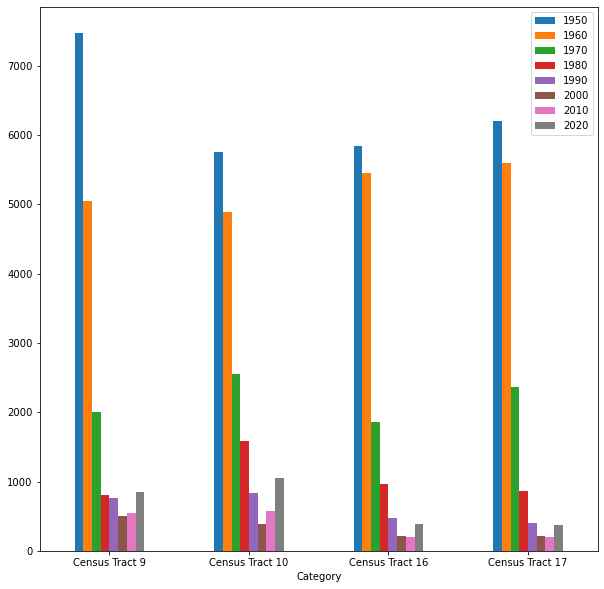

In [14]:
#White population in OTR by Census
Wdf.iloc[0:4].plot.bar(x = 'Category', figsize=(10,10), rot = 0)
plt.legend(loc='upper right')

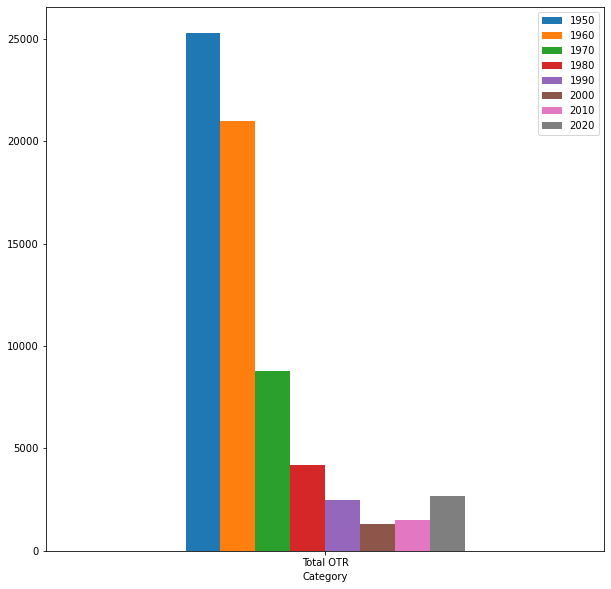

In [15]:
# Total White population in OTR
Wdf.iloc[4:5].plot.bar(x = 'Category', figsize=(10,10), rot= 0)
plt.legend(loc='upper right')

Text(0.5, 0.98, 'White population')

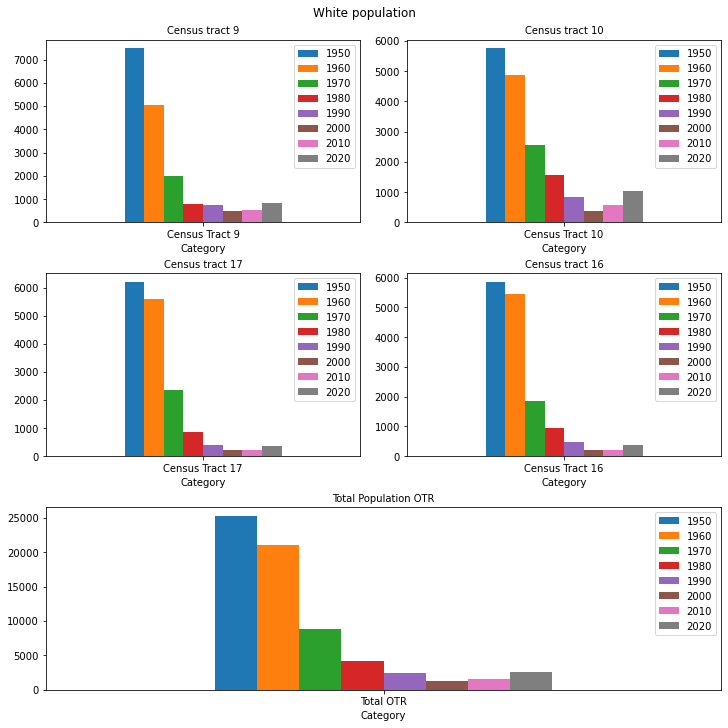

In [16]:
#Visualization of White population

fig = plt.figure(figsize=(5.5, 3.5), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax0 = fig.add_subplot(spec[0, 0])
Wdf.iloc[0:1].plot.bar(x = 'Category', figsize=(10,10), ax = ax0, rot = 0)
ax0.axis('on')
ax0.set_title('Census tract 9', fontsize = 10)

ax1 = fig.add_subplot(spec[0, 1])
Wdf.iloc[1:2].plot.bar(x = 'Category', figsize=(10,10), ax = ax1,rot = 0)
ax1.axis('on')
ax1.set_title('Census tract 10', fontsize = 10)

ax2 = fig.add_subplot(spec[1, 1])
Wdf.iloc[2:3].plot.bar(x = 'Category', figsize=(10,10), ax = ax2,rot = 0)
ax2.axis('on')
ax2.set_title('Census tract 16', fontsize = 10)

ax3 = fig.add_subplot(spec[1, 0])
Wdf.iloc[3:4].plot.bar(x = 'Category', figsize=(10,10), ax = ax3,rot = 0)
ax3.axis('on')
ax3.set_title('Census tract 17', fontsize = 10)

ax4 = fig.add_subplot(spec[2, :])
Wdf.iloc[4:5].plot.bar(x= 'Category', figsize=(10,10), ax = ax4,rot = 0)
ax4.axis('on')
ax4.set_title('Total Population OTR', fontsize = 10,)

fig.suptitle('White population')

Text(0.5, 0.98, 'Black population')

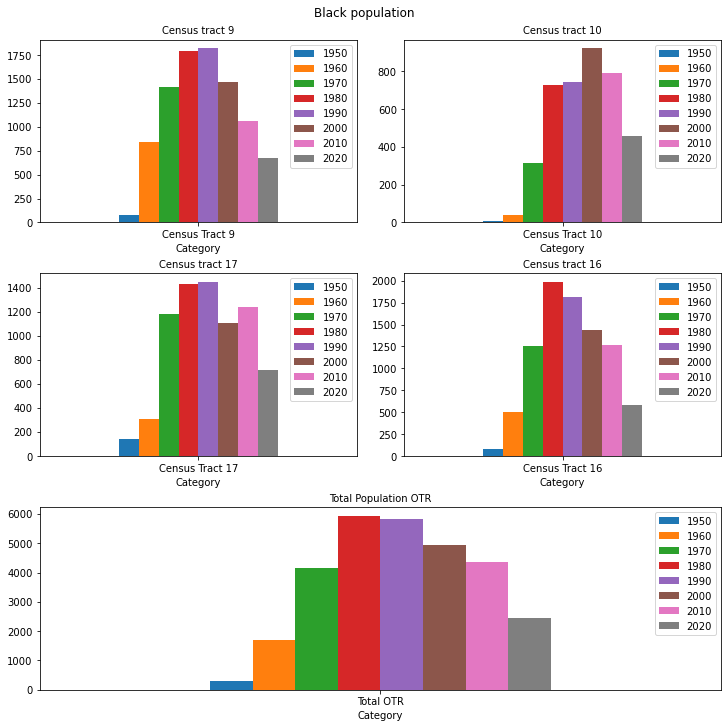

In [17]:
#Visualization of Black population

fig = plt.figure(figsize=(5.5, 3.5), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax0 = fig.add_subplot(spec[0, 0])
Bdf.iloc[0:1].plot.bar(x = 'Category', figsize=(10,10), ax = ax0,rot = 0)
ax0.axis('on')
ax0.set_title('Census tract 9', fontsize = 10)

ax1 = fig.add_subplot(spec[0, 1])
Bdf.iloc[1:2].plot.bar(x = 'Category', figsize=(10,10), ax = ax1,rot = 0)
ax1.axis('on')
ax1.set_title('Census tract 10', fontsize = 10)

ax2 = fig.add_subplot(spec[1, 1])
Bdf.iloc[2:3].plot.bar(x = 'Category', figsize=(10,10), ax = ax2,rot = 0)
ax2.axis('on')
ax2.set_title('Census tract 16', fontsize = 10)

ax3 = fig.add_subplot(spec[1, 0])
Bdf.iloc[3:4].plot.bar(x = 'Category', figsize=(10,10), ax = ax3,rot = 0)
ax3.axis('on')
ax3.set_title('Census tract 17', fontsize = 10)

ax4 = fig.add_subplot(spec[2, :])
Bdf.iloc[4:5].plot.bar(x = 'Category', figsize=(10,10), ax = ax4,rot = 0)
ax4.axis('on')
ax4.set_title('Total Population OTR', fontsize = 10)

fig.suptitle('Black population')

Text(0.5, 0.98, 'Comparison White & Black population')

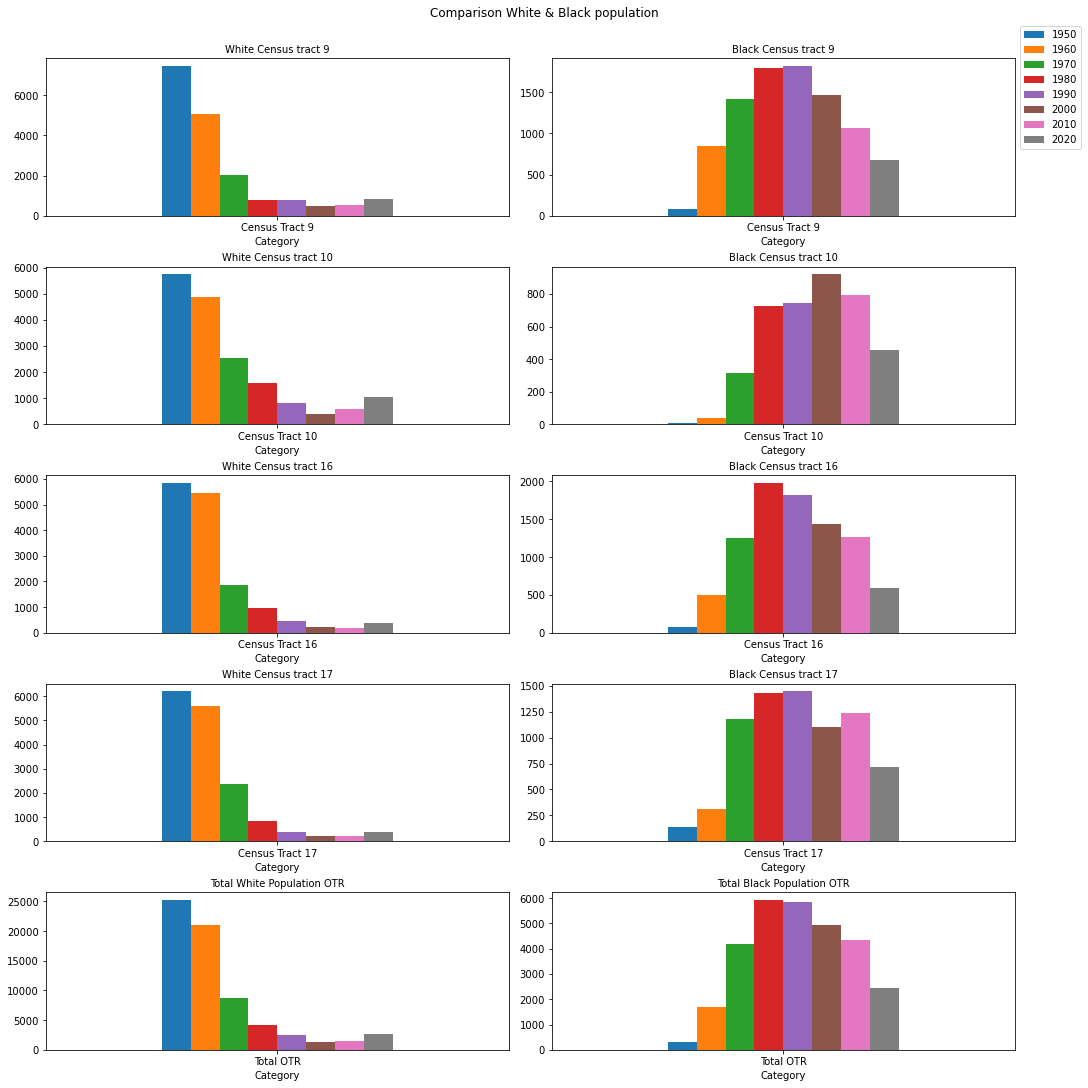

In [18]:
# Comparison White and Black population

fig = plt.figure(figsize=(15, 15), constrained_layout=True)
spec = fig.add_gridspec(5, 2)

ax0 = fig.add_subplot(spec[0, 0])
Wdf.iloc[0:1].plot.bar(x = 'Category', ax = ax0, rot = 0)
ax0.axis('on')
ax0.set_title('White Census tract 9', fontsize = 10)
ax0.get_legend().remove()

ax10 = fig.add_subplot(spec[0, 1])
Bdf.iloc[0:1].plot.bar(x = 'Category', ax = ax10,rot = 0)
ax10.axis('on')
ax10.set_title('Black Census tract 9', fontsize = 10)
ax10.legend(loc='center left', bbox_to_anchor=(1,0.815), numpoints=1)


ax1 = fig.add_subplot(spec[1, 0])
Wdf.iloc[1:2].plot.bar(x = 'Category', ax = ax1,rot = 0)
ax1.axis('on')
ax1.set_title('White Census tract 10', fontsize = 10)
ax1.get_legend().remove()

ax11 = fig.add_subplot(spec[1, 1])
Bdf.iloc[1:2].plot.bar(x = 'Category',  ax = ax11,rot = 0)
ax11.axis('on')
ax11.set_title('Black Census tract 10', fontsize = 10)
ax11.get_legend().remove()


ax2 = fig.add_subplot(spec[2, 0])
Wdf.iloc[2:3].plot.bar(x = 'Category', ax = ax2,rot = 0)
ax2.axis('on')
ax2.set_title('White Census tract 16', fontsize = 10)
ax2.get_legend().remove()

ax12 = fig.add_subplot(spec[2, 1])
Bdf.iloc[2:3].plot.bar(x = 'Category', ax = ax12,rot = 0)
ax12.axis('on')
ax12.set_title('Black Census tract 16', fontsize = 10)
ax12.get_legend().remove()


ax3 = fig.add_subplot(spec[3, 0])
Wdf.iloc[3:4].plot.bar(x = 'Category', ax = ax3,rot = 0)
ax3.axis('on')
ax3.set_title('White Census tract 17', fontsize = 10)
ax3.get_legend().remove()

ax13 = fig.add_subplot(spec[3, 1])
Bdf.iloc[3:4].plot.bar(x = 'Category', ax = ax13,rot = 0)
ax13.axis('on')
ax13.set_title('Black Census tract 17', fontsize = 10)
ax13.get_legend().remove()


ax4 = fig.add_subplot(spec[4, 0])
Wdf.iloc[4:5].plot.bar(x= 'Category', ax = ax4,rot = 0)
ax4.axis('on')
ax4.set_title('Total White Population OTR', fontsize = 10,)
ax4.get_legend().remove()

ax14 = fig.add_subplot(spec[4, 1])
Bdf.iloc[4:5].plot.bar(x = 'Category', ax = ax14,rot = 0)
ax14.axis('on')
ax14.set_title('Total Black Population OTR', fontsize = 10)
ax14.get_legend().remove()



fig.suptitle('Comparison White & Black population')

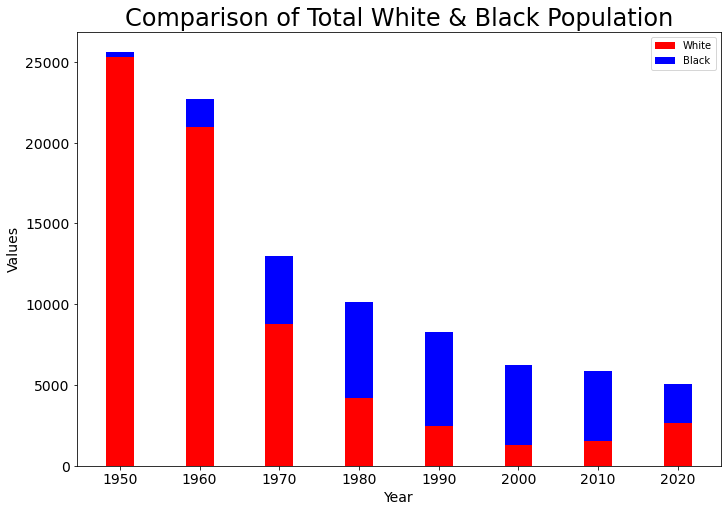

In [19]:
#Creating a stacked bar graph

fig = plt.figure(figsize=(10, 7), constrained_layout=True)

labels = ['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

white = Wdf.iloc[4:5,[1,2,3,4,5,6,7,8]].values.tolist()
black = Bdf.iloc[4:5,[1,2,3,4,5,6,7,8]].values.tolist()
white = [ item for elem in white for item in elem]
black = [ item for elem in black for item in elem]


#women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.bar(labels, white, width, label='White', color = 'r')
plt.bar(labels, black, width, bottom=white, label='Black',color='b')

plt.title('Comparison of Total White & Black Population',fontsize=24)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Values',fontsize=14)
plt.legend()

plt.tick_params(axis='both',labelsize=14)
plt.show()

# Analysis of educational attainment in OTR for years 2000, 2010, 2020
* Analyzing data from ACS on highest educational attainment
* Analyzing data from ACS on median income
* Visualizations of educational attainment and median income:
    * They show a correlation between higher educational degrees and higher incomes
    * One of the characteristics of gentrification is that the new residents have higher educational attainment and higher median income, which ultimately increases the cost of living in the neighborhood.
    * The last 20 years in OTR there has been an increase of the establishement of white population.
    * Analyzing the education and income of OTR determines if the increase of white population is correlated to that increase.

In [20]:
#Less than High School DataFrame
list1 = df_edu_2000.iloc[1:2].values.tolist()
list2 = df_edu_2010.iloc[1:2].values.tolist()
list3 = df_edu_2020.iloc[1:2].values.tolist()

list1 = [ item for elem in list1 for item in elem]
list2 = [ item for elem in list2 for item in elem]
list3 = [ item for elem in list3 for item in elem]

Category = ['Census Tract 9', 'Census Tract 10', 'Census Tract 16', 'Census Tract 17', 'Total OTR']

del list1[0]
del list2[0]
del list3[0]

Less_HS1 = pd.DataFrame(list(zip(Category, list1, list2, list3)), columns =['Category','2000', '2010', '2020']) 




#High School DataFrame
HS1 = df_edu_2000.iloc[2:3].values.tolist()
HS2 = df_edu_2010.iloc[2:3].values.tolist()
HS3 = df_edu_2020.iloc[2:3].values.tolist()

HS1 = [ item for elem in HS1 for item in elem]
HS2 = [ item for elem in HS2 for item in elem]
HS3 = [ item for elem in HS3 for item in elem]

Category = ['Census Tract 9', 'Census Tract 10', 'Census Tract 16', 'Census Tract 17', 'Total OTR']

del HS1[0]
del HS2[0]
del HS3[0]

HS = pd.DataFrame(list(zip(Category, HS1, HS2, HS3)), columns =['Category','2000', '2010', '2020']) 



#Some College Dataframe
C1 = df_edu_2000.iloc[3:4].values.tolist()
C2 = df_edu_2010.iloc[3:4].values.tolist()
C3 = df_edu_2020.iloc[3:4].values.tolist()

C1 = [ item for elem in C1 for item in elem]
C2 = [ item for elem in C2 for item in elem]
C3 = [ item for elem in C3 for item in elem]

Category = ['Census Tract 9', 'Census Tract 10', 'Census Tract 16', 'Census Tract 17', 'Total OTR']

del C1[0]
del C2[0]
del C3[0]

C = pd.DataFrame(list(zip(Category, C1, C2, C3)), columns =['Category','2000', '2010', '2020']) 



#Bachelor
B1 = df_edu_2000.iloc[4:5].values.tolist()
B2 = df_edu_2010.iloc[4:5].values.tolist()
B3 = df_edu_2020.iloc[4:5].values.tolist()

B1 = [ item for elem in B1 for item in elem]
B2 = [ item for elem in B2 for item in elem]
B3 = [ item for elem in B3 for item in elem]

Category = ['Census Tract 9', 'Census Tract 10', 'Census Tract 16', 'Census Tract 17', 'Total OTR']

del B1[0]
del B2[0]
del B3[0]

B = pd.DataFrame(list(zip(Category, B1, B2, B3)), columns =['Category','2000', '2010', '2020']) 



#Master
M1 = df_edu_2000.iloc[5:6].values.tolist()
M2 = df_edu_2010.iloc[5:6].values.tolist()
M3 = df_edu_2020.iloc[5:6].values.tolist()

M1 = [ item for elem in M1 for item in elem]
M2 = [ item for elem in M2 for item in elem]
M3 = [ item for elem in M3 for item in elem]

Category = ['Census Tract 9', 'Census Tract 10', 'Census Tract 16', 'Census Tract 17', 'Total OTR']

del M1[0]
del M2[0]
del M3[0]

M = pd.DataFrame(list(zip(Category, M1, M2, M3)), columns =['Category','2000', '2010', '2020']) 



#Professional School
PS1 = df_edu_2000.iloc[6:7].values.tolist()
PS2 = df_edu_2010.iloc[6:7].values.tolist()
PS3 = df_edu_2020.iloc[6:7].values.tolist()

PS1 = [ item for elem in PS1 for item in elem]
PS2 = [ item for elem in PS2 for item in elem]
PS3 = [ item for elem in PS3 for item in elem]

Category = ['Census Tract 9', 'Census Tract 10', 'Census Tract 16', 'Census Tract 17', 'Total OTR']

del PS1[0]
del PS2[0]
del PS3[0]

PS = pd.DataFrame(list(zip(Category, PS1, PS2, PS3)), columns =['Category','2000', '2010', '2020']) 



#Doctorate
D1 = df_edu_2000.iloc[7:8].values.tolist()
D2 = df_edu_2010.iloc[7:8].values.tolist()
D3 = df_edu_2020.iloc[7:8].values.tolist()

D1 = [ item for elem in D1 for item in elem]
D2 = [ item for elem in D2 for item in elem]
D3 = [ item for elem in D3 for item in elem]

Category = ['Census Tract 9', 'Census Tract 10', 'Census Tract 16', 'Census Tract 17', 'Total OTR']

del D1[0]
del D2[0]
del D3[0]

D = pd.DataFrame(list(zip(Category, D1, D2, D3)), columns =['Category','2000', '2010', '2020']) 

In [21]:
#Removing $ sign and changing strings to floats in the Income dataframes


#Dataframe Income 2000
df_inc_2000['Census Tract 9, Hamilton County, Ohio'] = df_inc_2000['Census Tract 9, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
df_inc_2000['Census Tract 10, Hamilton County, Ohio'] = df_inc_2000['Census Tract 10, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
df_inc_2000['Census Tract 16, Hamilton County, Ohio'] = df_inc_2000['Census Tract 16, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
df_inc_2000['Census Tract 17, Hamilton County, Ohio'] = df_inc_2000['Census Tract 17, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
df_inc_2000['TOTAL (All Selected Census Tracts)'] = df_inc_2000['TOTAL (All Selected Census Tracts)'].str.replace(',', '').str.replace(',', '').str.replace('$', '').astype(float)


#Dataframe Income 2010
df_inc_2010['Census Tract 9, Hamilton County, Ohio'] = df_inc_2010['Census Tract 9, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
df_inc_2010['Census Tract 10, Hamilton County, Ohio'] = df_inc_2010['Census Tract 10, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
df_inc_2010['Census Tract 16, Hamilton County, Ohio'] = df_inc_2010['Census Tract 16, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
df_inc_2010['Census Tract 17, Hamilton County, Ohio'] = df_inc_2010['Census Tract 17, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
df_inc_2010['TOTAL (All Selected Census Tracts)'] = df_inc_2010['TOTAL (All Selected Census Tracts)'].str.replace(',', '').str.replace(',', '').str.replace('$', '').astype(float)


#Dataframe Income 2020
df_inc_2020['Census Tract 9, Hamilton County, Ohio'] = df_inc_2020['Census Tract 9, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
df_inc_2020['Census Tract 10, Hamilton County, Ohio'] = df_inc_2020['Census Tract 10, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
df_inc_2020['Census Tract 16, Hamilton County, Ohio'] = df_inc_2020['Census Tract 16, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
df_inc_2020['Census Tract 17, Hamilton County, Ohio'] = df_inc_2020['Census Tract 17, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
df_inc_2020['TOTAL (All Selected Census Tracts)'] = df_inc_2020['TOTAL (All Selected Census Tracts)'].str.replace(',', '').str.replace(',', '').str.replace('$', '').astype(float)

C:\Users\Jesus\AppData\Local\Temp\ipykernel_31076\682524091.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_inc_2000['Census Tract 9, Hamilton County, Ohio'] = df_inc_2000['Census Tract 9, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\Jesus\AppData\Local\Temp\ipykernel_31076\682524091.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_inc_2000['Census Tract 10, Hamilton County, Ohio'] = df_inc_2000['Census Tract 10, Hamilton County, Ohio'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\Jesus\AppData\Local\Temp\ipykernel_31076\682524091.py:7: FutureWarning: The default value of regex will change from True 

* In the next plot, we can see that there has been an increase on educational attainment in OTR.
* From 2000 to 2020, there has been a decreased of population with only High School degrees
* However, there has been an increase in Bachelor's and Masters degrees.

Text(0.5, 0.98, 'Education Attainment 2000 - 2020')

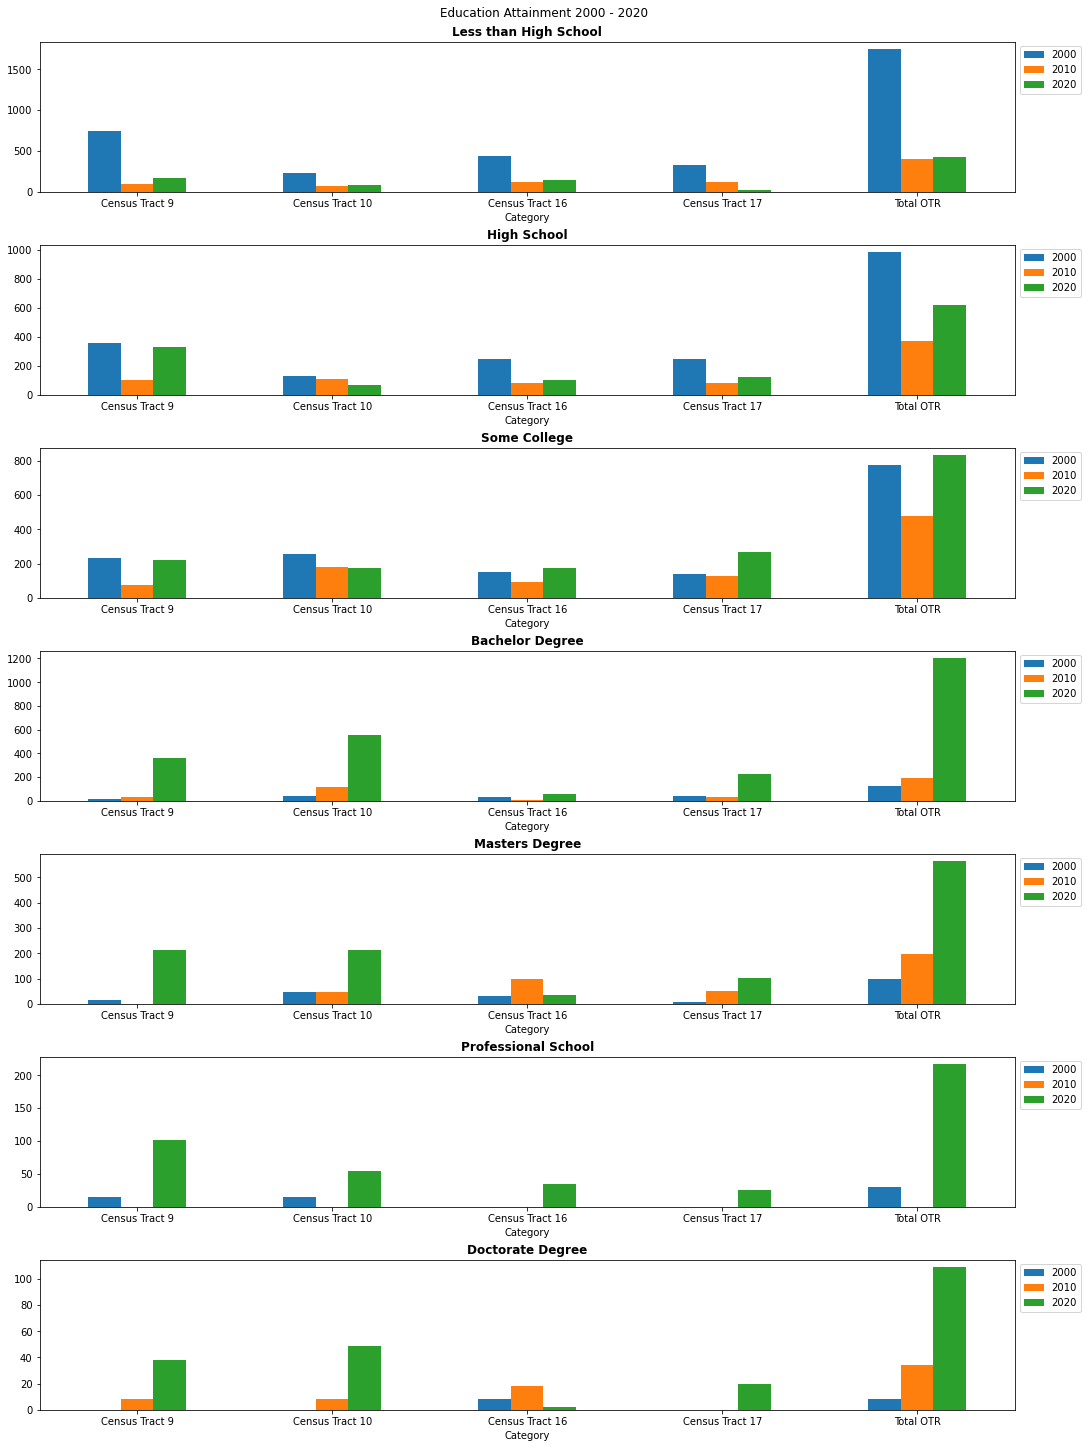

In [22]:
#Visualization of Comparison Education for years 2000, 2010, 2020

fig = plt.figure(figsize=(15, 20), constrained_layout=True)
spec = fig.add_gridspec(7, 1)

ax0 = fig.add_subplot(spec[0, 0])
Less_HS1.plot.bar(x = 'Category', ax = ax0,rot= 0)
ax0.axis('on')
ax0.set_title('Less than High School', fontsize = 12,fontweight="bold")
ax0.legend(loc='center left', bbox_to_anchor=(1,0.815), numpoints=1)

ax1 = fig.add_subplot(spec[1, 0])
HS.plot.bar(x = 'Category', ax = ax1,rot= 0)
ax1.axis('on')
ax1.set_title('High School', fontsize = 12,fontweight="bold")
ax1.legend(loc='center left', bbox_to_anchor=(1,0.815), numpoints=1)

ax2 = fig.add_subplot(spec[2, 0])
C.plot.bar(x = 'Category', ax = ax2, rot= 0)
ax2.axis('on')
ax2.set_title('Some College', fontsize = 12,fontweight="bold")
ax2.legend(loc='center left', bbox_to_anchor=(1,0.815), numpoints=1)

ax3 = fig.add_subplot(spec[3, 0])
B.plot.bar(x = 'Category', ax = ax3, rot= 0)
ax3.axis('on')
ax3.set_title('Bachelor Degree', fontsize = 12,fontweight="bold")
ax3.legend(loc='center left', bbox_to_anchor=(1,0.815), numpoints=1)

ax4 = fig.add_subplot(spec[4, 0])
M.plot.bar(x= 'Category', ax = ax4, rot= 0)
ax4.axis('on')
ax4.set_title('Masters Degree', fontsize = 12,fontweight="bold")
ax4.legend(loc='center left', bbox_to_anchor=(1,0.815), numpoints=1)

ax5 = fig.add_subplot(spec[5, 0])
PS.plot.bar(x= 'Category',  ax = ax5, rot= 0)
ax5.axis('on')
ax5.set_title('Professional School', fontsize = 12,fontweight="bold")
ax5.legend(loc='center left', bbox_to_anchor=(1,0.815), numpoints=1)

ax6 = fig.add_subplot(spec[6, 0])
D.plot.bar(x= 'Category',  ax = ax6, rot= 0)
ax6.axis('on')
ax6.set_title('Doctorate Degree', fontsize = 12,fontweight="bold")
ax6.legend(loc='center left', bbox_to_anchor=(1,0.815), numpoints=1)


fig.suptitle('Education Attainment 2000 - 2020')

* At the same time we can see the correlation of the higher educational attainment with the higher median incomes.

Text(0.5, 0.98, 'Median Income Comparison White & Black population')

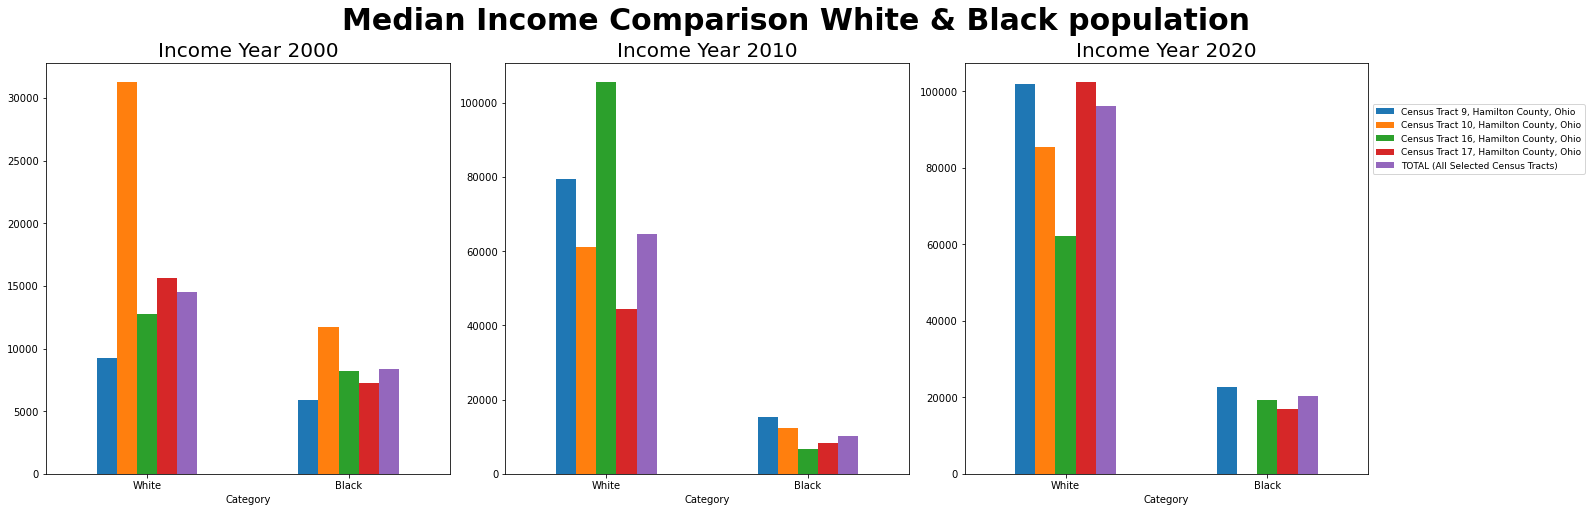

In [23]:
# Visualization Comparison of Median Income between White and Black populations

df_inc_2000['Category'] = ['Median', 'White', 'Black']
df_inc_2010['Category'] = ['Median', 'White', 'Black']
df_inc_2020['Category'] = ['Median', 'White', 'Black']

fig = plt.figure(figsize=(22, 7), constrained_layout=True)
spec = fig.add_gridspec(1, 3)

#Census Tract 9
ax0 = fig.add_subplot(spec[0, 0])
df_inc_2000.iloc[1:3].plot.bar(x = 'Category', ax = ax0, rot = 0)
ax0.axis('on')
ax0.set_title('Income Year 2000', fontsize = 20)
ax0.get_legend().remove()

ax10 = fig.add_subplot(spec[0, 1])
df_inc_2010.iloc[1:3].plot.bar(x = 'Category', ax = ax10,rot = 0)
ax10.axis('on')
ax10.set_title('Income Year 2010', fontsize = 20)
ax10.get_legend().remove()

ax20 = fig.add_subplot(spec[0, 2])
df_inc_2020.iloc[1:3].plot.bar(x = 'Category', ax = ax20,rot = 0)
ax20.axis('on')
ax20.set_title('Income Year 2020', fontsize = 20)

ax20.legend(loc='center left', bbox_to_anchor=(1,0.815), numpoints=1, prop={'size':9})

fig.suptitle('Median Income Comparison White & Black population', fontsize = 30, fontweight='bold')


# Creating scatterplots of white population
* Visualization of the demographic changes in white population between years 1950 - 2020
* Visualization of white demographic increase for years 2000, 2010, & 2020
* Creating regression lines to confirm a trend in the increase of white population
* Calculating Pearsons coeffiecient 
    * To confirm a negative trend between years 1950 -2020
    * To confirm a positive trend between years 2000 - 2020

In [24]:
#Modifiying White population dataframe to create scatterplots

WdfT = Wdf.transpose()
WdfT = WdfT.reset_index()
WdfT.drop(labels = [0], axis =0, inplace=True)
dict = { 0: 'Census 9',
        1: 'Census 10',
        2: 'Census 16',
        3: 'Census 17',
        4: 'Total',
      }
 
#call rename () method
WdfT.rename(columns=dict, 
         inplace=True)

WdfT = WdfT.astype(float)


# Scatter plot for years 1950 -2000
* It shows a negative trend of white population
* The regression line depicts this trend

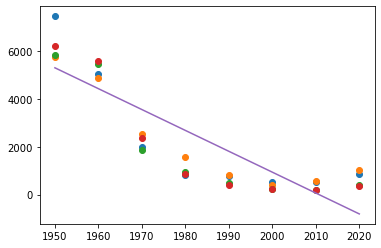

In [25]:
#Scatter plot for White population for years 1950 - 2020

x = WdfT['index']
y = WdfT['Census 9']
y2 = WdfT['Census 10']
y3 = WdfT['Census 16']
y4 = WdfT['Census 17']
#y = y1,y2,y3,y4

ax1 = plt.plot(x,y, 'o')
ax2 = plt.plot(x,y2, 'o')
ax3 = plt.plot(x,y3, 'o')
ax4 = plt.plot(x,y4, 'o')


m, b = np.polyfit(x,y, 1)
plt.plot(x, m*x+b)

#### The Pearson coefficient (r) is a type of correlation coefficient that represents the relationship between two variables that are measured on the same interval.
* The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. 
* Values of the coefficient r range between -1 and 1
* Values closer to -1 represent a strong negative correlation
* Values closer to 1 represent a strong positive correlation
* In this case the coefficient r shows a strong negative correlation between years and the overall decrease of the white population in OTR between 1950 - 2000

In [26]:
#Calculating Pearson Coefficient for years 1950 - 2020
a = np.array(WdfT['index'])
b = np.array(WdfT['Census 9'])
c = np.array(WdfT['Census 10'])
d = np.array(WdfT['Census 16'])
e = np.array(WdfT['Census 17'])


r1 = np.corrcoef(a, b)
r2 = np.corrcoef(a, c)
r3 = np.corrcoef(a, d)
r4 = np.corrcoef(a, e)

corr1, _ = pearsonr(a, b)
corr2, _ = pearsonr(a, c)
corr3, _ = pearsonr(a, d)
corr4, _ = pearsonr(a, e)

print('Pearsons correlation for Census Tract 9: %.3f' % corr1)
print('Pearsons correlation for Census Tract 10: %.3f' % corr2)
print('Pearsons correlation for Census Tract 16: %.3f' % corr3)
print('Pearsons correlation for Census Tract 17: %.3f' % corr4)

Pearsons correlation for Census Tract 9: -0.824
Pearsons correlation for Census Tract 10: -0.877
Pearsons correlation for Census Tract 16: -0.862
Pearsons correlation for Census Tract 17: -0.872


# Scatter plot for years 2000-2020
* For years 2000, 2010, and 2020, the scatter plot and regression line show a increase of the white population in OTR

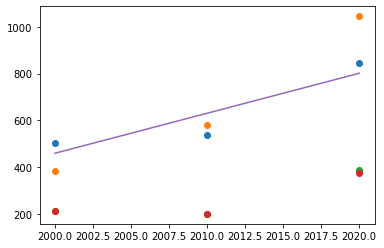

In [27]:
#Scatter plot for White population for years 2000, 2010, 2020

x = WdfT['index'].iloc[5:8]
y = WdfT['Census 9'].iloc[5:8]
y2 = WdfT['Census 10'].iloc[5:8]
y3 = WdfT['Census 16'].iloc[5:8]
y4 = WdfT['Census 17'].iloc[5:8]
#y = y1,y2,y3,y4

ax1 = plt.plot(x,y, 'o')
ax2 = plt.plot(x,y2, 'o')
ax3 = plt.plot(x,y3, 'o')
ax4 = plt.plot(x,y4, 'o')


m, b = np.polyfit(x,y, 1)
plt.plot(x, m*x+b)

* These other visualizations help depict the increase of white populations for the years 2000 - 2020

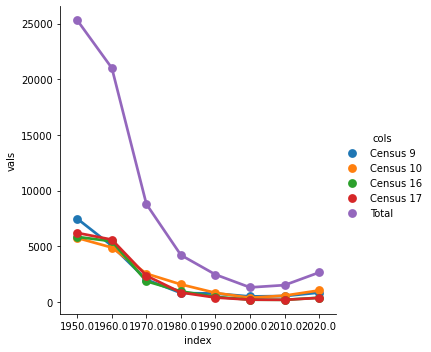

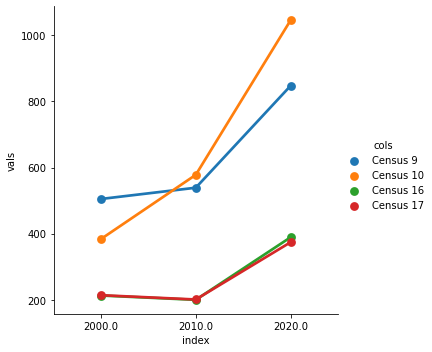

In [28]:
#Creating other visualizations to help see the increase of white population between years 2000 - 2020
dfm = WdfT.melt('index', var_name='cols', value_name='vals')
g = sns.catplot(x="index", y="vals", hue='cols', data=dfm, kind='point')

dfm1 = WdfT.iloc[5:8,[0,1,2,3,4]].melt('index', var_name='cols', value_name='vals')
g = sns.catplot(x="index", y="vals", hue='cols', data=dfm1, kind='point')

* The Pearson coefficient for years 2000 - 2020 depict a correlation between two variables, the years and the white population in OTR
* The values of coefficient r being closer to 1, representing a strong correlation

In [29]:
#Calculating Pearson Coefficient for years 2000, 2010, 2020

f = np.array(WdfT['index'].iloc[5:8])
g = np.array(WdfT['Census 9'].iloc[5:8])
h = np.array(WdfT['Census 10'].iloc[5:8])
i = np.array(WdfT['Census 16'].iloc[5:8])
j = np.array(WdfT['Census 17'].iloc[5:8])


r5 = np.corrcoef(f, g)
r6 = np.corrcoef(f, h)
r7 = np.corrcoef(f, i)
r8 = np.corrcoef(f, j)

r5, r6, r7, r8,
corr5, _ = pearsonr(f, g)
corr6, _ = pearsonr(f, h)
corr7, _ = pearsonr(f, i)
corr8, _ = pearsonr(f, j)

print('Pearsons correlation for Census Tract 9: %.3f' % corr5)
print('Pearsons correlation for Census Tract 10: %.3f' % corr6)
print('Pearsons correlation for Census Tract 16: %.3f' % corr7)
print('Pearsons correlation for Census Tract 17: %.3f' % corr8)

Pearsons correlation for Census Tract 9: 0.908
Pearsons correlation for Census Tract 10: 0.973
Pearsons correlation for Census Tract 16: 0.834
Pearsons correlation for Census Tract 17: 0.830
